In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, mean_squared_error,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
sb.set() # set the default Seaborn style for graphics

In [2]:
#IMPORT CLEANED DATASET FROM CSV FILE
cardio_clean = pd.read_csv('Dataset\cardio_clean.csv')

In [3]:
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0


In [4]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


# MultiLayer Perceptron

In [5]:
#change categorical-level to numeric-level

cardio_clean['Chol'] = cardio_clean['Chol'].replace(['N','B','H'],[0,1,2]) 
cardio_clean['Gluc'] = cardio_clean['Gluc'].replace(['N','B','H'],[0,1,2])
cardio_clean['Gender'] = cardio_clean['Gender'].replace(['M','F'],[0,1])
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,0,168,62.0,22.0,110,80,0,0,0,0,1,0
1,1,55,1,156,85.0,34.9,140,90,2,0,0,0,1,1
2,2,52,1,165,64.0,23.5,130,70,2,0,0,0,0,1
3,3,48,0,169,82.0,28.7,150,100,0,0,0,0,1,1
4,8,60,1,151,67.0,29.4,120,80,1,1,0,0,0,0


In [6]:
# Separate the predictors to X and Response to y
y = cardio_clean['Cardio']
X = cardio_clean.drop(['Cardio'],axis=1)
X = X.drop(['id'],axis=1)
X.head()

,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active
0,50,0,168,62.0,22.0,110,80,0,0,0,0,1
1,55,1,156,85.0,34.9,140,90,2,0,0,0,1
2,52,1,165,64.0,23.5,130,70,2,0,0,0,0
3,48,0,169,82.0,28.7,150,100,0,0,0,0,1
4,60,1,151,67.0,29.4,120,80,1,1,0,0,0


In [7]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [69]:
#press stop if accidentally ran
# Finding best hyper parameter for neural network for dataset with outliers

MLP = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (10,10,10), (30,30,30),(10,10),(30,30),(50,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.710 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'sgd'}
0.722 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'solver': 'adam'}
0.625 (+/-0.192) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
0.723 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
0.696 (+/-0.027) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'sgd'}
0.725 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30), 'solver': 'adam'}
0.669 (+/-0.162) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'solver': 'sgd'}
0.719 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,

With outliers neural network
train Classification report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.75     22397
           1       0.78      0.61      0.68     21763

    accuracy                           0.72     44160
   macro avg       0.74      0.72      0.72     44160
weighted avg       0.73      0.72      0.72     44160

Matthews corrcoef  (MCC) 	: 0.45718320878330204
train accuracy: 0.7236865942028986

test Classification report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      7482
           1       0.78      0.60      0.68      7238

    accuracy                           0.72     14720
   macro avg       0.73      0.72      0.71     14720
weighted avg       0.73      0.72      0.71     14720

Matthews corrcoef  (MCC) 	: 0.44686208444056985
test accuracy : 0.7188179347826087



<AxesSubplot:>

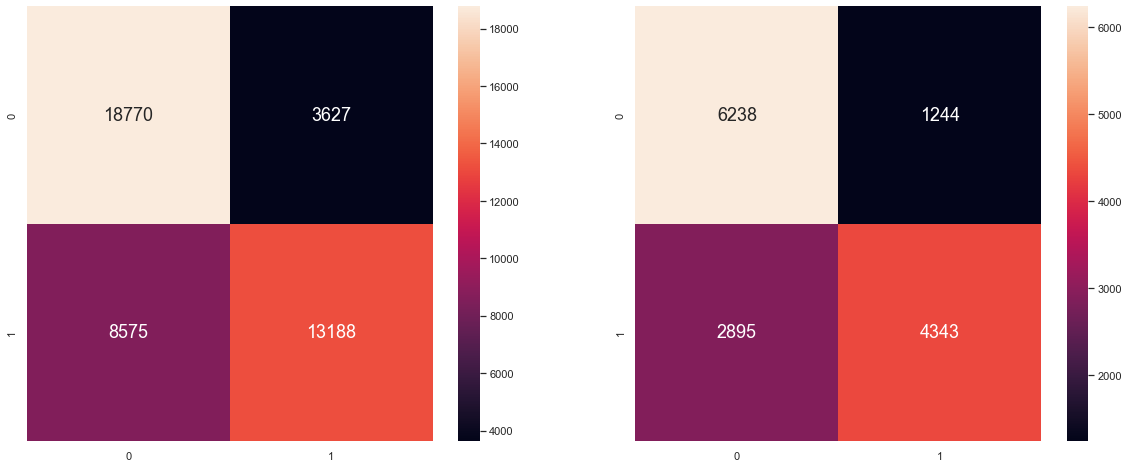

In [112]:
MLP=MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (50, 50, 50), solver= 'adam')
MLP.fit(X_train,y_train.values.ravel())
y_train_pred=MLP.predict(X_train)
y_test_pred=MLP.predict(X_test)
MLP_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
MLP_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
MLP_train_as = accuracy_score(y_train,y_train_pred)
MLP_test_as = accuracy_score(y_test,y_test_pred)

print('With outliers neural network')
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", MLP_train_mcc)
print('train accuracy:', MLP_train_as)
print()

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", MLP_test_mcc)
print('test accuracy :', MLP_test_as)
print()

f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [113]:
train_sizes, train_scores, test_scores = learning_curve(MLP, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [114]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

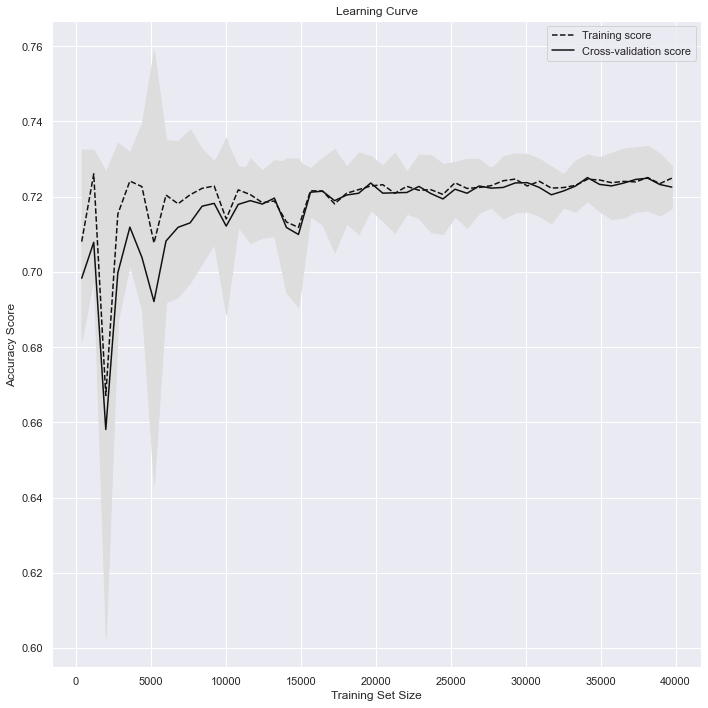

In [115]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [78]:
r = []
for i in range(294, 29401, 294):
    r.append(i)
print(r)

[294, 588, 882, 1176, 1470, 1764, 2058, 2352, 2646, 2940, 3234, 3528, 3822, 4116, 4410, 4704, 4998, 5292, 5586, 5880, 6174, 6468, 6762, 7056, 7350, 7644, 7938, 8232, 8526, 8820, 9114, 9408, 9702, 9996, 10290, 10584, 10878, 11172, 11466, 11760, 12054, 12348, 12642, 12936, 13230, 13524, 13818, 14112, 14406, 14700, 14994, 15288, 15582, 15876, 16170, 16464, 16758, 17052, 17346, 17640, 17934, 18228, 18522, 18816, 19110, 19404, 19698, 19992, 20286, 20580, 20874, 21168, 21462, 21756, 22050, 22344, 22638, 22932, 23226, 23520, 23814, 24108, 24402, 24696, 24990, 25284, 25578, 25872, 26166, 26460, 26754, 27048, 27342, 27636, 27930, 28224, 28518, 28812, 29106, 29400]


In [80]:
m_iter = []
MLP = MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=1000,activation='relu', alpha = 0.05, batch_size = 200)
parameter_space = {
    'max_iter': r
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    m_iter.append(mean)

Best parameters found:
 {'max_iter': 13230}
0.725 (+/-0.008) for {'max_iter': 294}
0.721 (+/-0.012) for {'max_iter': 588}
0.725 (+/-0.004) for {'max_iter': 882}
0.721 (+/-0.013) for {'max_iter': 1176}
0.725 (+/-0.010) for {'max_iter': 1470}
0.721 (+/-0.015) for {'max_iter': 1764}
0.724 (+/-0.008) for {'max_iter': 2058}
0.724 (+/-0.009) for {'max_iter': 2352}
0.724 (+/-0.013) for {'max_iter': 2646}
0.724 (+/-0.007) for {'max_iter': 2940}
0.721 (+/-0.007) for {'max_iter': 3234}
0.723 (+/-0.004) for {'max_iter': 3528}
0.725 (+/-0.008) for {'max_iter': 3822}
0.722 (+/-0.011) for {'max_iter': 4116}
0.724 (+/-0.007) for {'max_iter': 4410}
0.724 (+/-0.010) for {'max_iter': 4704}
0.724 (+/-0.007) for {'max_iter': 4998}
0.721 (+/-0.006) for {'max_iter': 5292}
0.723 (+/-0.011) for {'max_iter': 5586}
0.721 (+/-0.010) for {'max_iter': 5880}
0.725 (+/-0.008) for {'max_iter': 6174}
0.722 (+/-0.007) for {'max_iter': 6468}
0.723 (+/-0.008) for {'max_iter': 6762}
0.723 (+/-0.005) for {'max_iter': 7056}

Text(0, 0.5, 'Accuracy')

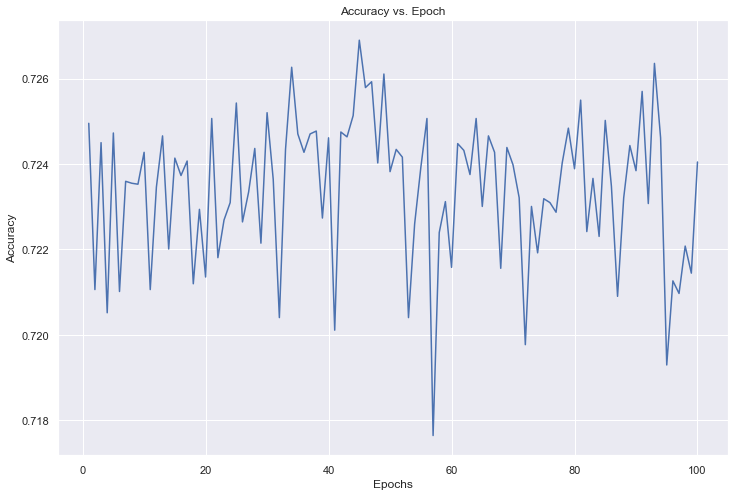

In [81]:
plt.figure(figsize = (12,8))
plt.plot((range(1,101)), m_iter)
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [60]:
b = []
for i in range(1, 50):
    b.append(i)
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [61]:
m_size = []
MLP = MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=100000,activation='relu', alpha = 0.05)
parameter_space = {
    'batch_size': b
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    m_size.append(mean)

Best parameters found:
 {'batch_size': 38}
0.701 (+/-0.029) for {'batch_size': 1}
0.708 (+/-0.009) for {'batch_size': 2}
0.709 (+/-0.012) for {'batch_size': 3}
0.711 (+/-0.020) for {'batch_size': 4}
0.714 (+/-0.006) for {'batch_size': 5}
0.708 (+/-0.025) for {'batch_size': 6}
0.704 (+/-0.026) for {'batch_size': 7}
0.715 (+/-0.007) for {'batch_size': 8}
0.709 (+/-0.022) for {'batch_size': 9}
0.711 (+/-0.024) for {'batch_size': 10}
0.717 (+/-0.009) for {'batch_size': 11}
0.716 (+/-0.018) for {'batch_size': 12}
0.716 (+/-0.008) for {'batch_size': 13}
0.720 (+/-0.010) for {'batch_size': 14}
0.713 (+/-0.031) for {'batch_size': 15}
0.715 (+/-0.010) for {'batch_size': 16}
0.716 (+/-0.017) for {'batch_size': 17}
0.718 (+/-0.012) for {'batch_size': 18}
0.721 (+/-0.012) for {'batch_size': 19}
0.720 (+/-0.010) for {'batch_size': 20}
0.716 (+/-0.011) for {'batch_size': 21}
0.716 (+/-0.013) for {'batch_size': 22}
0.720 (+/-0.009) for {'batch_size': 23}
0.721 (+/-0.007) for {'batch_size': 24}
0.717 

Text(0, 0.5, 'Accuracy')

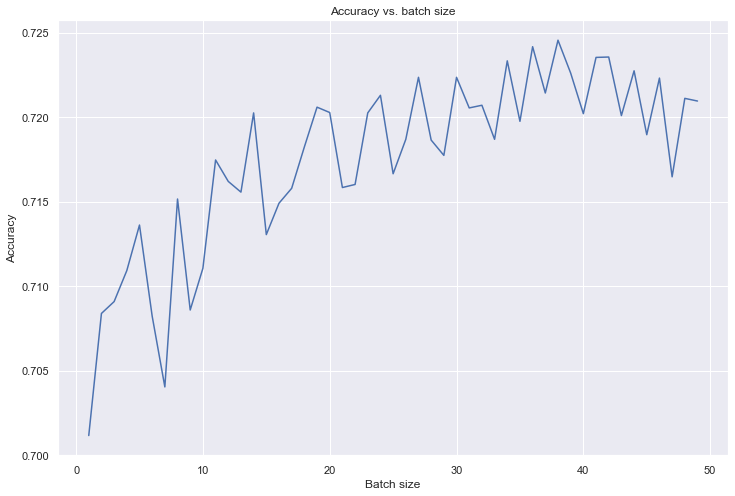

In [62]:
plt.figure(figsize = (12,8))
plt.plot(b, m_size)
plt.title('Accuracy vs. Batch size')
plt.xlabel('Batch size')
plt.ylabel('Accuracy')

In [74]:
l = [ (5), (5,5), (5,5,5), (5,5,5,5), (5,5,5,5,5), (5,5,5,5,5,5), (5,5,5,5,5,5,5),(5,5,5,5,5,5,5,5),(5,5,5,5,5,5,5,5,5),(5,5,5,5,5,5,5,5,5,5)]

In [75]:
m_layer = []
MLP = MLPClassifier(max_iter=100000,activation='relu', alpha = 0.05, batch_size = 200)
parameter_space = {
    'hidden_layer_sizes': l
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    m_layer.append(mean)

Best parameters found:
 {'hidden_layer_sizes': (5, 5, 5, 5)}
0.720 (+/-0.006) for {'hidden_layer_sizes': 5}
0.722 (+/-0.007) for {'hidden_layer_sizes': (5, 5)}
0.722 (+/-0.007) for {'hidden_layer_sizes': (5, 5, 5)}
0.724 (+/-0.006) for {'hidden_layer_sizes': (5, 5, 5, 5)}
0.723 (+/-0.007) for {'hidden_layer_sizes': (5, 5, 5, 5, 5)}
0.722 (+/-0.009) for {'hidden_layer_sizes': (5, 5, 5, 5, 5, 5)}
0.724 (+/-0.009) for {'hidden_layer_sizes': (5, 5, 5, 5, 5, 5, 5)}
0.721 (+/-0.007) for {'hidden_layer_sizes': (5, 5, 5, 5, 5, 5, 5, 5)}
0.723 (+/-0.007) for {'hidden_layer_sizes': (5, 5, 5, 5, 5, 5, 5, 5, 5)}
0.722 (+/-0.003) for {'hidden_layer_sizes': (5, 5, 5, 5, 5, 5, 5, 5, 5, 5)}


Text(0, 0.5, 'Accuracy')

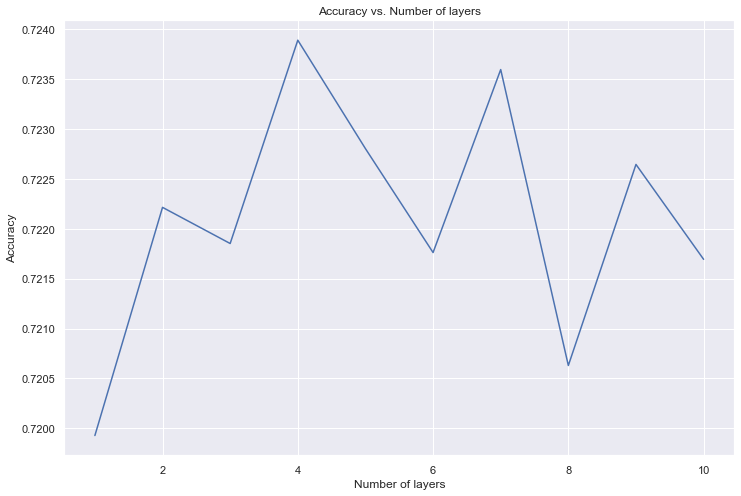

In [80]:
plt.figure(figsize = (12,8))
plt.plot((range(1,11)), m_layer)
plt.title('Accuracy vs. Number of layers')
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')

In [77]:
h = [ (10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70), (80,80,80), (90,90,90), (100,100,100) ]

In [78]:
m_nodes = []
MLP = MLPClassifier(max_iter=100000,activation='relu', alpha = 0.05, batch_size = 200)
parameter_space = {
    'hidden_layer_sizes': h
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    m_nodes.append(mean)

Best parameters found:
 {'hidden_layer_sizes': (70, 70, 70)}
0.710 (+/-0.048) for {'hidden_layer_sizes': (10, 10, 10)}
0.724 (+/-0.009) for {'hidden_layer_sizes': (20, 20, 20)}
0.723 (+/-0.010) for {'hidden_layer_sizes': (30, 30, 30)}
0.721 (+/-0.008) for {'hidden_layer_sizes': (40, 40, 40)}
0.725 (+/-0.008) for {'hidden_layer_sizes': (50, 50, 50)}
0.725 (+/-0.008) for {'hidden_layer_sizes': (60, 60, 60)}
0.726 (+/-0.005) for {'hidden_layer_sizes': (70, 70, 70)}
0.724 (+/-0.009) for {'hidden_layer_sizes': (80, 80, 80)}
0.725 (+/-0.006) for {'hidden_layer_sizes': (90, 90, 90)}
0.720 (+/-0.011) for {'hidden_layer_sizes': (100, 100, 100)}


Text(0, 0.5, 'Accuracy')

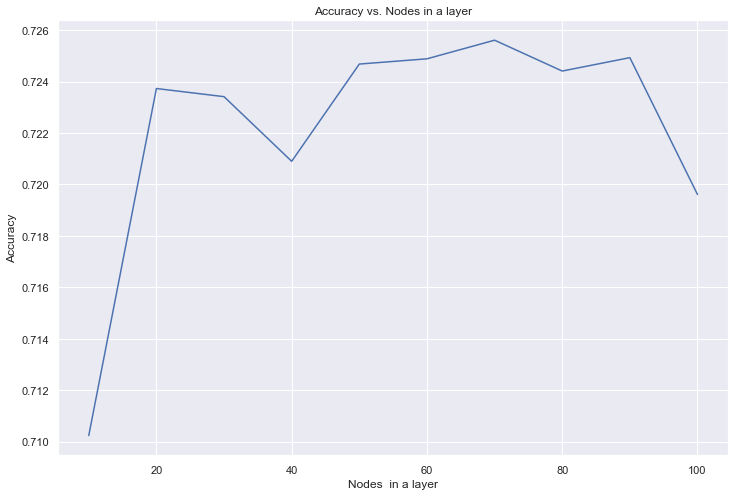

In [84]:
plt.figure(figsize = (12,8))
plt.plot((range(10,101,10)), m_nodes)
plt.title('Accuracy vs. Nodes in a layer')
plt.xlabel('Nodes  in a layer')
plt.ylabel('Accuracy')

In [102]:
a = [0.00000001,0.00000005,0.0000001,0.0000005,0.000001,0.000005] 

In [103]:
m_alpha = []
MLP = MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=100000,activation='relu', batch_size = 200)
parameter_space = {
    'alpha': a
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    m_alpha.append(mean)

Best parameters found:
 {'alpha': 5e-07}
0.722 (+/-0.008) for {'alpha': 1e-08}
0.725 (+/-0.003) for {'alpha': 5e-08}
0.723 (+/-0.008) for {'alpha': 1e-07}
0.726 (+/-0.006) for {'alpha': 5e-07}
0.724 (+/-0.012) for {'alpha': 1e-06}
0.724 (+/-0.006) for {'alpha': 5e-06}


Text(0, 0.5, 'Accuracy')

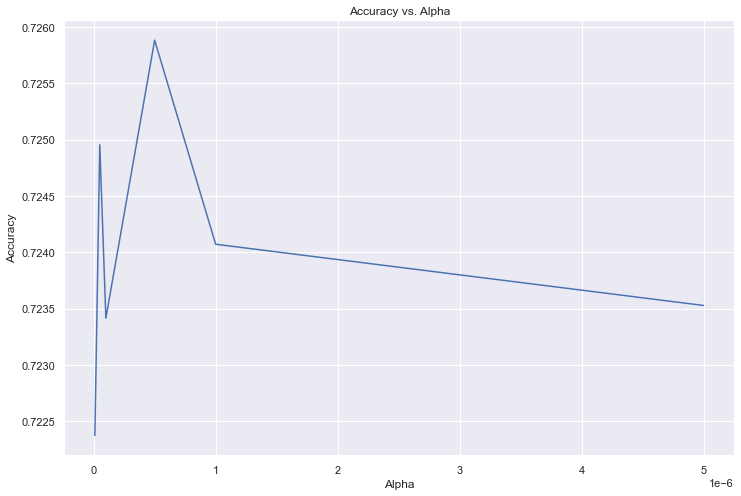

In [104]:
plt.figure(figsize = (12,8))
plt.plot(a, m_alpha)
plt.title('Accuracy vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

In [96]:
i = [0.00001,0.00002,0.00004,0.00006,0.00008,0.0001] 

In [97]:
m_init = []
MLP = MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=100000,activation='relu', batch_size = 200, alpha = 0.05)
parameter_space = {
    'learning_rate_init': i
}
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    m_init.append(mean)

Best parameters found:
 {'learning_rate_init': 4e-05}
0.723 (+/-0.006) for {'learning_rate_init': 1e-05}
0.723 (+/-0.006) for {'learning_rate_init': 2e-05}
0.724 (+/-0.008) for {'learning_rate_init': 4e-05}
0.724 (+/-0.003) for {'learning_rate_init': 6e-05}
0.722 (+/-0.009) for {'learning_rate_init': 8e-05}
0.721 (+/-0.008) for {'learning_rate_init': 0.0001}


Text(0, 0.5, 'Accuracy')

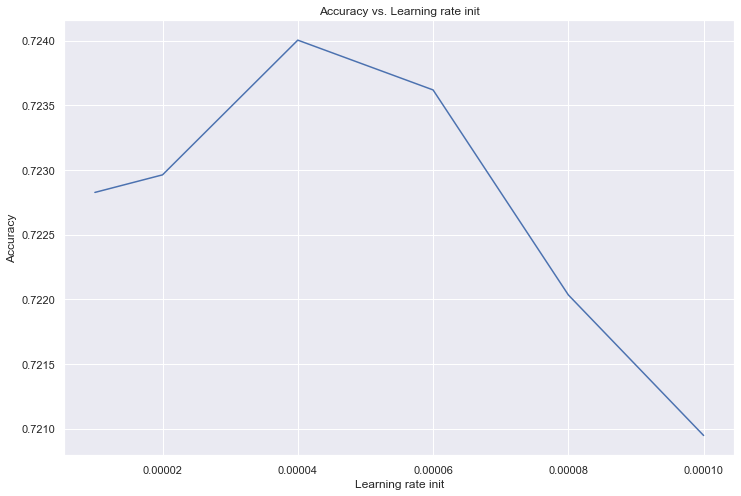

In [98]:
plt.figure(figsize = (12,8))
plt.plot(i, m_init)
plt.title('Accuracy vs. Learning rate init')
plt.xlabel('Learning rate init')
plt.ylabel('Accuracy')

In [108]:
MLP=MLPClassifier(hidden_layer_sizes=(70, 70, 70, 70),max_iter=84115, batch_size = 35,activation='relu',solver='adam',learning_rate_init=0.00004,alpha=0.00000005)
parameter_space = {
    'learning_rate':['invscaling', 'constant', 'adaptive'],
    'shuffle': [True,False] 
}

clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'learning_rate': 'invscaling', 'shuffle': True}
0.725 (+/-0.008) for {'learning_rate': 'invscaling', 'shuffle': True}
0.723 (+/-0.009) for {'learning_rate': 'invscaling', 'shuffle': False}
0.724 (+/-0.010) for {'learning_rate': 'constant', 'shuffle': True}
0.723 (+/-0.007) for {'learning_rate': 'constant', 'shuffle': False}
0.722 (+/-0.013) for {'learning_rate': 'adaptive', 'shuffle': True}
0.723 (+/-0.007) for {'learning_rate': 'adaptive', 'shuffle': False}


With outliers neural network
train Classification report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72     22397
           1       0.71      0.74      0.73     21763

    accuracy                           0.73     44160
   macro avg       0.73      0.73      0.73     44160
weighted avg       0.73      0.73      0.73     44160

Matthews corrcoef  (MCC) 	: 0.45094984663342835
train accuracy: 0.7251811594202898

test Classification report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      7482
           1       0.71      0.74      0.73      7238

    accuracy                           0.73     14720
   macro avg       0.73      0.73      0.73     14720
weighted avg       0.73      0.73      0.73     14720

Matthews corrcoef  (MCC) 	: 0.4522849382271226
test accuracy : 0.7258831521739131



<AxesSubplot:>

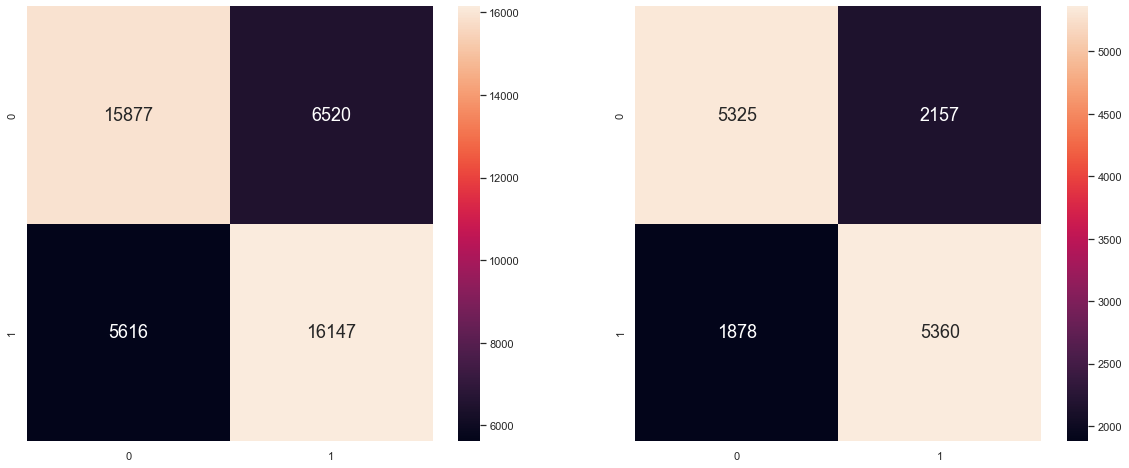

In [109]:
MLP=MLPClassifier(hidden_layer_sizes=(70, 70, 70, 70),max_iter=84115, learning_rate = 'invscaling', batch_size = 35,activation='relu',solver='adam',learning_rate_init=0.00004,alpha=0.00000005)
MLP.fit(X_train,y_train.values.ravel())
y_train_pred=MLP.predict(X_train)
y_test_pred=MLP.predict(X_test)
MLP_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
MLP_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
MLP_train_as = accuracy_score(y_train,y_train_pred)
MLP_test_as = accuracy_score(y_test,y_test_pred)

print('With outliers neural network')
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", MLP_train_mcc)
print('train accuracy:', MLP_train_as)
print()

print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", MLP_test_mcc)
print('test accuracy :', MLP_test_as)
print()

f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])